In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 가져오기

```python
# 자료 디렉토리 링크
os.system("mkdir -p ~/aiffel/bike_regression/data")
os.system("ln -s ~/data/data/* ~/aiffel/bike_regression/data")
```

In [2]:
bikesd = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
print(bikesd.shape)
bikesd.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [97]:
# bikesd.columns
target= 'count'
features = bikesd.columns.drop(target)
print(bikesd[target])

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


### 자료형 변환, 컬럼 생성

In [5]:
# pd.to_datetime(bikesd['datetime']).dt.year.head()
bikesd['datetime'] = pd.to_datetime(bikesd['datetime'])
bikesd['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [6]:
bikesd['year'] = bikesd['datetime'].dt.year
bikesd['month'] = bikesd['datetime'].dt.month
bikesd['day'] = bikesd['datetime'].dt.day
bikesd['hour'] = bikesd['datetime'].dt.hour
bikesd['minute'] = bikesd['datetime'].dt.minute
bikesd['second'] = bikesd['datetime'].dt.second
bikesd.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 데이터 개수 시각화

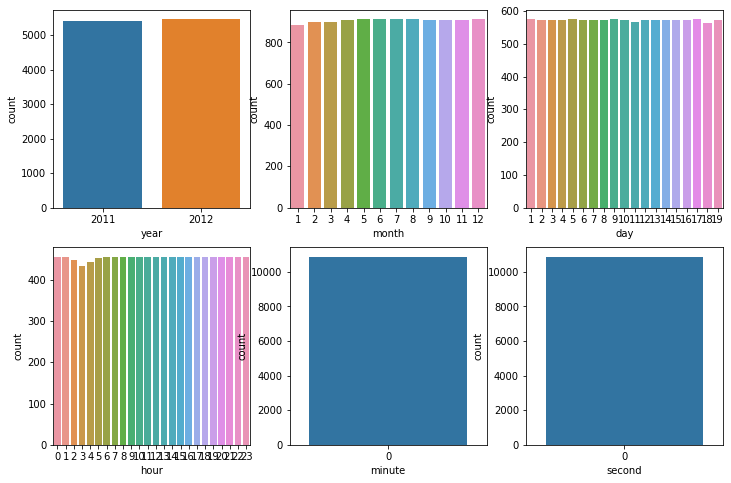

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3 )
fig.set_size_inches(12, 8)

sns.countplot(data=bikesd, x="year", ax=ax1)
sns.countplot(data=bikesd, x="month", ax=ax2)
sns.countplot(data=bikesd, x="day", ax=ax3)
sns.countplot(data=bikesd, x="hour", ax=ax4)
sns.countplot(data=bikesd, x="minute", ax=ax5)
sns.countplot(data=bikesd, x="second", ax=ax6)
plt.show()

### X, y 컬럼 선택 및 train/test 데이터 분리

In [237]:
df_y = bikesd[target]
df_y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [238]:
# 불필요한 컬럼 제거
features = features.drop(
    ['datetime','casual','registered', 'minute', 'second'])

df_X = bikesd[features]
df_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [239]:
# 원핫인코딩
df_X = pd.get_dummies(df_X, columns=[
        'season', 'weather', 'month', 'day', 'hour'])
df_X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            df_X, df_y, test_size=0.2, random_state=61)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

(8708, 70) (8708,)
(2178, 70) (2178,)


,holiday,workingday,temp,atemp,humidity,windspeed,year,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
9104,0,0,31.16,36.365,66,6.0032,2012,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3504,0,1,27.06,31.060,69,16.9979,2011,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8898,0,1,26.24,30.305,69,0.0000,2012,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1707,0,0,17.22,21.210,67,15.0013,2011,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5587,0,0,18.04,21.970,38,16.9979,2012,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### LinearRegression 모델 학습

In [268]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [269]:
#train 데이터로 Linear Regression 모델 학습
model.fit(X_train, y_train)

LinearRegression()

```python
# 러닝 커브 그리기; 잘 모르겠다.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    model, df_X, df_y, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, train_scores)
# plt.plot(train_sizes, valid_scores)
```

### 예측값 출력 및 손실함수값 계산

In [270]:
# R-squared 점수
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print((score_train, score_test))

(0.6927605579886973, 0.699388226036709)


In [271]:
# R-squared 점수에서 역산한 MSE
print((1-score_train)*y_train.var())
print((1-score_test)*y_test.var())

10063.657361990898
9938.468204695862


In [272]:
# test 데이터에서 얻은 모델의 예측 값
y_pred = model.predict(X_test)

In [273]:
# 패키지내 MSE함수, RSME 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print((mse, rmse))

(9933.905087981124, 99.66897756062879)


### 예측 결과 시각화하기

In [274]:
X_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
8572,0,1,38.54,42.425,33,0.0000,2012,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3505,0,1,26.24,30.305,69,15.0013,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5149,0,1,13.12,16.665,45,8.9981,2011,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1170,0,0,18.04,21.970,41,27.9993,2011,1,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,9.02,10.605,37,16.9979,2011,1,0,0,...,0,0,0,1,0,0,0,0,0,0


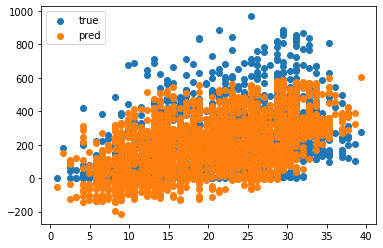

In [275]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.legend()
plt.show()